## Fall 2020 CS559 Final Exam Part 2. (80 pts)

This is the second part of the final exam. In this section, there are 3 questions and any use of internet or resources are not permitted. You are allowed to use any built-in functions and libraries. You are going to submit two files in `ipynb` and `html` formats. Do not erase any middle work even the codes did not run correctly. If the code did not run, you can just work on the next command line. 

In [1666]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import math
from datetime import date, datetime
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

### 1. Data Preprocessing. (20 pts)
This question involves data preprocessing that needs to be done before modeling. The data comes from a global company, including orders from 2012 to 2015. Import the dataset `Orders.csv`.

1-1. Check `Profit` and `Sales` in the dataset, convert these two columns to numeric type and name them `New Profit` and "New Sales", respectively. (4 pts)

In [1667]:
orderSet = pd.read_csv('Orders.csv')

In [1668]:
orderSet['New Profit'] = orderSet['Profit'].str.replace(',', '').str.replace('$', '').astype('float')
orderSet['New Sales'] = orderSet['Sales'].str.replace(',', '').str.replace('$', '').astype('float')
orderSet = orderSet.drop(columns = ['Profit', 'Sales'])

In [1669]:
orderSet

Row.ID                  Order.ID Order.Date Ship.Date       Ship.Mode  \
0       40098  CA-2014-AB10015140-41954   11/11/14  11/13/14     First Class   
1       26341    IN-2014-JR162107-41675     2/5/14    2/7/14    Second Class   
2       25330    IN-2014-CR127307-41929   10/17/14  10/18/14     First Class   
3       13524   ES-2014-KM1637548-41667    1/28/14   1/30/14     First Class   
4       47221   SG-2014-RH9495111-41948    11/5/14   11/6/14        Same Day   
...       ...                       ...        ...       ...             ...   
51285   29002   IN-2015-KE1642066-42174    6/19/15   6/19/15        Same Day   
51286   34337  US-2014-ZD21925140-41765     5/6/14   5/10/14  Standard Class   
51287   31315  CA-2012-ZD21925140-41147    8/26/12   8/31/12    Second Class   
51288    9596   MX-2013-RB1979518-41322    2/17/13   2/21/13  Standard Class   
51289    6147   MX-2013-MC1810093-41416    5/22/13   5/26/13    Second Class   

        Customer.ID       Customer.Name      Segment  Postal.Code  \
0      AB-100151402       Aaron Bergman     Consumer      73120.0   
1         JR-162107       Justin Ritter    Corporate          NaN   
2         CR-127307        Craig Reiter     Consumer          NaN   
3        KM-1637548    Katherine Murray  Home Office          NaN   
4        RH-9495111         Rick Hansen     Consumer          NaN   
...             ...                 ...          ...          ...   
51285    KE-1642066     Katrina Edelman    Corporate          NaN   
51286  ZD-219251408  Zuschuss Donatelli     Consumer      37421.0   
51287  ZD-219251404  Zuschuss Donatelli     Consumer      94109.0   
51288    RB-1979518          Ross Baird  Home Office          NaN   
51289    MC-1810093       Mick Crebagga     Consumer          NaN   

                City  ...   Product.ID         Category Sub.Category  \
0      Oklahoma City  ...  TEC-PH-5816       Technology       Phones   
1         Wollongong  ...  FUR-CH-5379        Furniture       Chairs   
2           Brisbane  ...  TEC-PH-5356       Technology       Phones   
3             Berlin  ...  TEC-PH-5267       Technology       Phones   
4              Dakar  ...  TEC-CO-6011       Technology      Copiers   
...              ...  ...          ...              ...          ...   
51285           Kure  ...  OFF-FA-3072  Office Supplies    Fasteners   
51286    Chattanooga  ...  FUR-FU-4070        Furniture  Furnishings   
51287  San Francisco  ...  OFF-AR-5321  Office Supplies          Art   
51288       Valinhos  ...  OFF-BI-2919  Office Supplies      Binders   
51289       Tipitapa  ...  OFF-PA-3990  Office Supplies        Paper   

                                        Product.Name Quantity Discount  \
0                                   Samsung Convoy 3        2      0.0   
1          Novimex Executive Leather Armchair, Black        9      0.1   
2                  Nokia Smart Phone, with Caller ID        9      0.1   
3                     Motorola Smart Phone, Cordless        5      0.1   
4                     Sharp Wireless Fax, High-Speed        8      0.0   
...                                              ...      ...      ...   
51285                  Advantus Thumb Tacks, 12 Pack        5      0.0   
51286  Eldon Image Series Desk Accessories, Burgundy        5      0.2   
51287                                     Newell 341        2      0.0   
51288                        Acco Index Tab, Economy        2      0.0   
51289        Eaton Computer Printout Paper, 8.5 x 11        3      0.0   

      Shipping.Cost Order.Priority  New Profit  New Sales  
0            40.770           High       62.15     221.98  
1           923.630       Critical     -288.77    3709.40  
2           915.490         Medium      919.97    5175.17  
3           910.160         Medium      -96.54    2892.51  
4           903.040       Critical      311.52    2832.96  
...             ...            ...         ...        ...  
51285         1.010         Medium        4

1-2. Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year’s inventory. He wants you to answer the following questions: (4 pts)
- Is there any seasonal sales trend in your company?
- Is there any seasonal trend of different categories of products?

Yes there are seasonal sales trends in the company that will be explained below. Also the seasonal trends carry on for the different categores as well. This will be explained below with charts.

In [1670]:
orderSet['Order.Date'] =  pd.to_datetime(orderSet['Order.Date'])
orderSet['Ship.Date'] =  pd.to_datetime(orderSet['Ship.Date'])
orderSet.sort_values('Order.Date', inplace=False)
orderSet

Row.ID                  Order.ID Order.Date  Ship.Date       Ship.Mode  \
0       40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
1       26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
2       25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18     First Class   
3       13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30     First Class   
4       47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06        Same Day   
...       ...                       ...        ...        ...             ...   
51285   29002   IN-2015-KE1642066-42174 2015-06-19 2015-06-19        Same Day   
51286   34337  US-2014-ZD21925140-41765 2014-05-06 2014-05-10  Standard Class   
51287   31315  CA-2012-ZD21925140-41147 2012-08-26 2012-08-31    Second Class   
51288    9596   MX-2013-RB1979518-41322 2013-02-17 2013-02-21  Standard Class   
51289    6147   MX-2013-MC1810093-41416 2013-05-22 2013-05-26    Second Class   

        Customer.ID       Customer.Name      Segment  Postal.Code  \
0      AB-100151402       Aaron Bergman     Consumer      73120.0   
1         JR-162107       Justin Ritter    Corporate          NaN   
2         CR-127307        Craig Reiter     Consumer          NaN   
3        KM-1637548    Katherine Murray  Home Office          NaN   
4        RH-9495111         Rick Hansen     Consumer          NaN   
...             ...                 ...          ...          ...   
51285    KE-1642066     Katrina Edelman    Corporate          NaN   
51286  ZD-219251408  Zuschuss Donatelli     Consumer      37421.0   
51287  ZD-219251404  Zuschuss Donatelli     Consumer      94109.0   
51288    RB-1979518          Ross Baird  Home Office          NaN   
51289    MC-1810093       Mick Crebagga     Consumer          NaN   

                City  ...   Product.ID         Category Sub.Category  \
0      Oklahoma City  ...  TEC-PH-5816       Technology       Phones   
1         Wollongong  ...  FUR-CH-5379        Furniture       Chairs   
2           Brisbane  ...  TEC-PH-5356       Technology       Phones   
3             Berlin  ...  TEC-PH-5267       Technology       Phones   
4              Dakar  ...  TEC-CO-6011       Technology      Copiers   
...              ...  ...          ...              ...          ...   
51285           Kure  ...  OFF-FA-3072  Office Supplies    Fasteners   
51286    Chattanooga  ...  FUR-FU-4070        Furniture  Furnishings   
51287  San Francisco  ...  OFF-AR-5321  Office Supplies          Art   
51288       Valinhos  ...  OFF-BI-2919  Office Supplies      Binders   
51289       Tipitapa  ...  OFF-PA-3990  Office Supplies        Paper   

                                        Product.Name Quantity Discount  \
0                                   Samsung Convoy 3        2      0.0   
1          Novimex Executive Leather Armchair, Black        9      0.1   
2                  Nokia Smart Phone, with Caller ID        9      0.1   
3                     Motorola Smart Phone, Cordless        5      0.1   
4                     Sharp Wireless Fax, High-Speed        8      0.0   
...                                              ...      ...      ...   
51285                  Advantus Thumb Tacks, 12 Pack        5      0.0   
51286  Eldon Image Series Desk Accessories, Burgundy        5      0.2   
51287                                     Newell 341        2      0.0   
51288                        Acco Index Tab, Economy        2      0.0   
51289        Eaton Computer Printout Paper, 8.5 x 11        3      0.0   

      Shipping.Cost Order.Priority  New Profit  New Sales  
0            40.770           High       62.15     221.98  
1           923.630       Critical     -288.77    3709.40  
2           915.490         Medium      919.97    5175.17  
3           910.160         Medium      -96.54    2892.51  
4           903.040       Critical      311.52    2832.96  
...             ...            ...         ...        ...  
51285         1.010         Med

In [1671]:
def get_season(now):
    seasons = [('Winter', (date(Y,  1,  1),  date(Y,  3, 20))), 
               ('Spring', (date(Y,  3, 21),  date(Y,  6, 20))),
               ('Summer', (date(Y,  6, 21),  date(Y,  9, 21))),
               ('Fall', (date(Y,  9, 22),  date(Y, 12, 20))),
               ('Winter', (date(Y, 12, 21),  date(Y, 12, 31)))]
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

#print(get_season(orderSet['Order.Date'].iloc[350]))
season = []
for item, i in orderSet.iterrows():
    try:
        #print(get_season(i['Order.Date']))
        season.append(get_season(i['Order.Date']))
    except:
        print('Error: Problem Saving Season')
        break
orderSet['Season'] = season

In [1672]:
yearDict = {2012:[], 2013:[], 2014:[], 2015:[]}
for item, i in orderSet.iterrows():
    try:
        #print(type(i['Order.Date'].year))
        yearDict[i['Order.Date'].year].append(get_season(i['Order.Date']))
    except:
        print('Error: Problem Saving Season')
        break

In [1673]:
sznDf = []
for i in np.unique(np.array(season)):
    sznDf.append(len(np.where(np.array(season) == i)[0]))
name = np.unique(np.array(season))
dic = {'Season': name, 'Num of Sales': sznDf}
pd.DataFrame(data=dic)

Season  Num of Sales
0    Fall         16734
1  Spring         11475
2  Summer         14167
3  Winter          8914

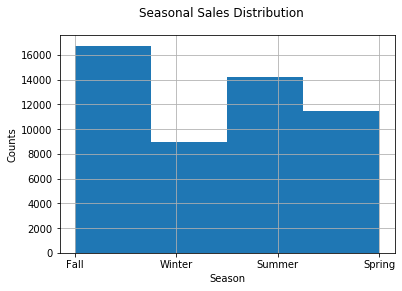

In [1674]:
fig = plt.figure()
fig.suptitle('Seasonal Sales Distribution')
plt.xlabel('Season')
plt.ylabel("Counts")
orderSet['Season'].hist(bins=4)
plt.show()

Throughout 2012 and 2015, it seems that the number of sale counts is lowest in the winter, and gradually increases until the fall, and there it is the highest count out of all the seasons.

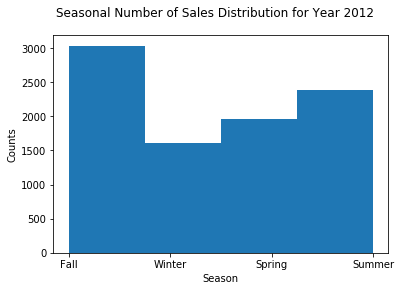

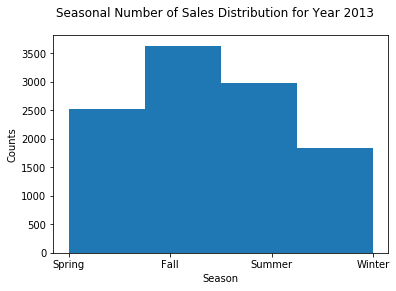

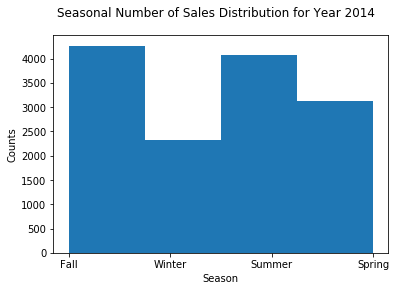

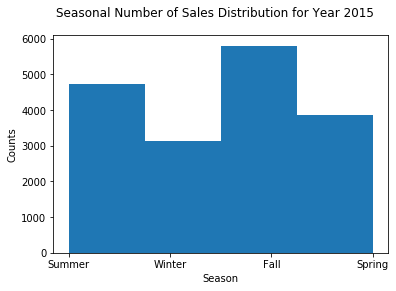

In [1675]:
for i in yearDict:
    fig = plt.figure()
    fig.suptitle('Seasonal Number of Sales Distribution for Year ' + str(i))
    plt.xlabel('Season')
    plt.ylabel("Counts")
    plt.hist(yearDict[i], bins=4)
    plt.show()

In the above 4 histograms, you can see the count of sales being split by year, and for the most part follows the same trend that the sales count is lowest in winter, a little more in spring, more in summer, and is highest in the fall. In the Summer of 2014, the count of sales almost reached the same count of sales in 2014 fall.

In [1676]:
year2012Dict = {'Winter':0, 'Summer':0, 'Fall':0, 'Spring':0}
year2013Dict = {'Winter':0, 'Summer':0, 'Fall':0, 'Spring':0}
year2014Dict = {'Winter':0, 'Summer':0, 'Fall':0, 'Spring':0}
year2015Dict = {'Winter':0, 'Summer':0, 'Fall':0, 'Spring':0}
for item, i in orderSet.iterrows():
    try:
        if i['Order.Date'].year == 2012:
            year2012Dict[get_season(i['Order.Date'])] += orderSet.iloc[item]['New Sales']
        if i['Order.Date'].year == 2013:
            year2013Dict[get_season(i['Order.Date'])] += orderSet.iloc[item]['New Sales']
        if i['Order.Date'].year == 2014:
            year2014Dict[get_season(i['Order.Date'])] += orderSet.iloc[item]['New Sales']
        if i['Order.Date'].year == 2015:
            year2015Dict[get_season(i['Order.Date'])] += orderSet.iloc[item]['New Sales']
    except:
        print('Error: Problem Saving Season')
        break

In [1677]:
def returnPercentages(arr):
    o, tw, th, f = arr
    s = sum(arr)
    return [(o/s)*100 , (tw/s)*100 , (th/s)*100 , (f/s)*100]

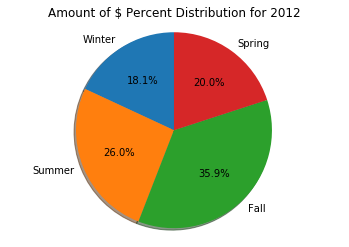

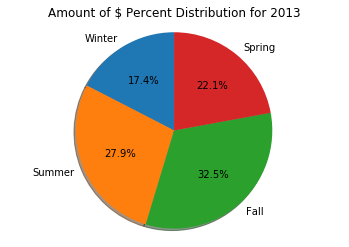

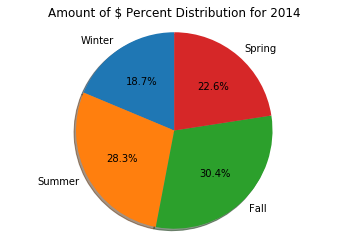

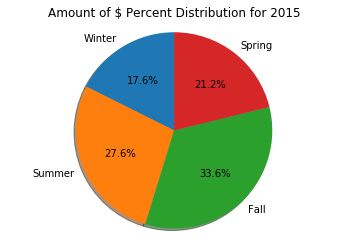

In [1678]:
fig1, ax1 = plt.subplots()
ax1.pie(returnPercentages([year2012Dict[i] for i in year2012Dict]), explode=None, labels=[i for i in year2012Dict], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("Amount of $ Percent Distribution for 2012")
ax1.axis('equal')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(returnPercentages([year2013Dict[i] for i in year2013Dict]), explode=None, labels=[i for i in year2013Dict], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("Amount of $ Percent Distribution for 2013")
ax1.axis('equal')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(returnPercentages([year2014Dict[i] for i in year2014Dict]), explode=None, labels=[i for i in year2014Dict], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("Amount of $ Percent Distribution for 2014")
ax1.axis('equal')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(returnPercentages([year2015Dict[i] for i in year2015Dict]), explode=None, labels=[i for i in year2015Dict], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("Amount of $ Percent Distribution for 2015")
ax1.axis('equal')
plt.show()

Not always does the count of sales mean the money in sales as the items are priced, so I wanted to look at the percentage of money being spent per season per year. Across the 4 years, during winter there is about 17-18% of money spending of the whole year, in the spring it increases to around 20-22%, and in the summer, it increases to around 26-28%, and during the fall the sales increases to hold around 30-35% of the total money spent in the year, so it shows the similar trend as the count of sales explained in the previous histograms.

In [1679]:
seasonDict = {'Winter':[], 'Spring':[], 'Summer':[], 'Fall':[]}
np.unique(orderSet['Category'])

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [1680]:
furnitureDict = {2012:[], 2013:[], 2014:[], 2015:[]}
officeDict = {2012:[], 2013:[], 2014:[], 2015:[]}
techDict = {2012:[], 2013:[], 2014:[], 2015:[]}
for item, i in orderSet.iterrows():
    try:
        if orderSet.iloc[item]['Category'] == 'Furniture':
            furnitureDict[i['Order.Date'].year].append(get_season(i['Order.Date']))
        if orderSet.iloc[item]['Category'] == 'Office Supplies':
            officeDict[i['Order.Date'].year].append(get_season(i['Order.Date']))
        if orderSet.iloc[item]['Category'] == 'Technology':
            techDict[i['Order.Date'].year].append(get_season(i['Order.Date']))
    except:
        print('Error: Problem Saving Season')
        break

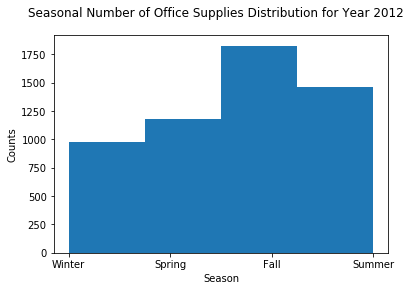

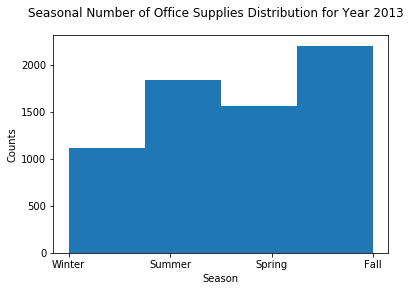

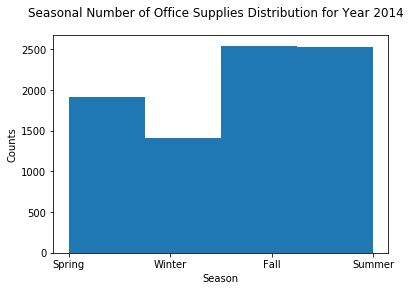

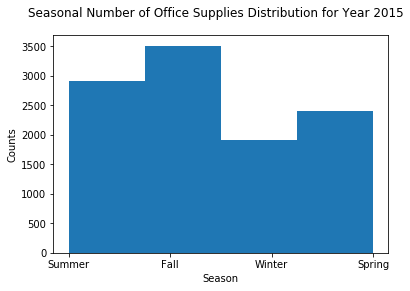

In [1681]:
for i in officeDict:
    fig = plt.figure()
    fig.suptitle('Seasonal Number of Office Supplies Distribution for Year ' + str(i))
    plt.xlabel('Season')
    plt.ylabel("Counts")
    plt.hist(officeDict[i], bins=4)
    plt.show()

For the office supplies, throughout the years, we see the count of sales increasing as time progresses from winter to fall, and drops at winter again. It is similar to the overall sales count histogram before, and the 2014 graph shows similar to the 2014 overall where the summer count is close to the fall sales count.

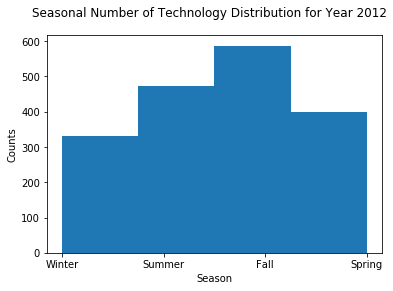

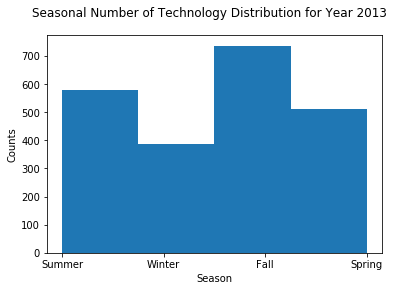

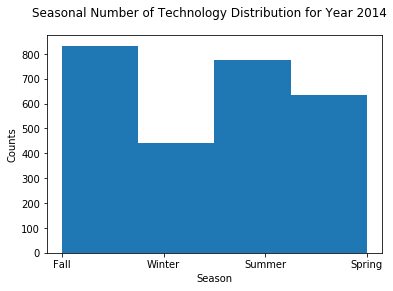

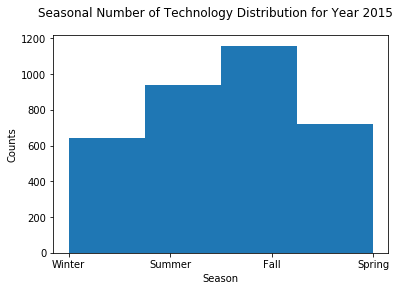

In [1682]:
for i in techDict:
    fig = plt.figure()
    fig.suptitle('Seasonal Number of Technology Distribution for Year ' + str(i))
    plt.xlabel('Season')
    plt.ylabel("Counts")
    plt.hist(techDict[i], bins=4)
    plt.show()

For the technology, throughout the years, we see the count of sales increasing as time progresses from winter to fall, and drops at winter again.

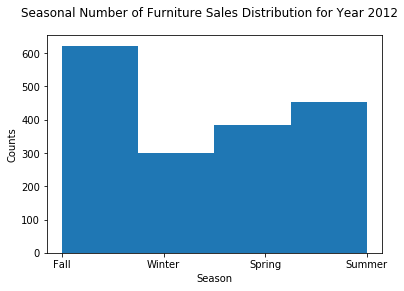

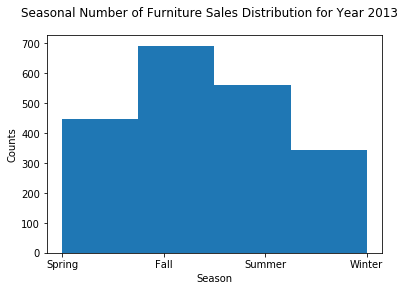

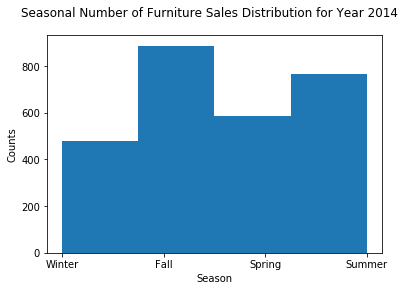

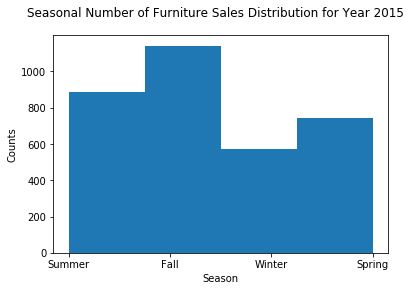

In [1683]:
for i in furnitureDict:
    fig = plt.figure()
    fig.suptitle('Seasonal Number of Furniture Sales Distribution for Year ' + str(i))
    plt.xlabel('Season')
    plt.ylabel("Counts")
    plt.hist(furnitureDict[i], bins=4)
    plt.show()

For the office supplies, throughout the years, we see the count of sales increasing as time progresses from winter to fall, and drops at winter again. It is similar to the overall sales count histogram before.

1-3. Your manager required you to give a brief report (Plots + Interpretations) on returned orders from the `Returns.csv` dataset. (10 pts)

- How much profit did we lose for each year?
- How many customer returned more than once? more than 10 times?
- Which regions are more likely to return orders?
- Which categories (sub-categories) of products are more likely to be returned?
- Will different ship mode affect the possibility of return? Standard class is the most common ship mode, but it is not necessarily true that its return ratio is also the highest.
- Hint: 
    - Import Returns.csv
    - Merge the Returns dataframe you imported with the Orders dataframe.
    - One order might contains multiple products so you will have more observations after the merge.

In [1684]:
returns = pd.read_csv('Returns.csv')
returns['Order.ID'] = returns['Order ID']
returns = returns.drop(columns = ['Order ID'])
merged = orderSet.merge(returns, how = 'inner', on='Order.ID')

In [1685]:
lossDict = {2012:0, 2013:0, 2014:0, 2015:0}
for item, i in merged.iterrows():
    try:
        lossDict[i['Order.Date'].year] += i['New Profit']
    except:
        print('Error: Problem Saving Season')
        break

for i in lossDict:
    print(f"The profit lossed in year {i} was ${round(lossDict[i],2)}.")

The profit lossed in year 2012 was $17477.26.
The profit lossed in year 2013 was $9269.89.
The profit lossed in year 2014 was $17510.63.
The profit lossed in year 2015 was $17112.97.


In [1686]:
mot = {}
for item, i in merged.iterrows():
    try:
        mot[i['Customer.ID']] += 1
    except:
        mot[i['Customer.ID']] = 1
        
count_once = 0
for i in mot:
    if mot[i] > 1:
        count_once += 1

count_twice = 0
for i in mot:
    if mot[i] > 10:
        count_twice += 1

#more_than_once = len(merged) - len(np.unique(merged['Customer.ID']))
print(f"{count_once} customers returned more than once.")
print(f"{count_twice} customers returned more than 10 times.")

547 customers returned more than once.
2 customers returned more than 10 times.


In [1687]:
reg = {}
for item, i in returns.iterrows():
    try:
        reg[i['Region']] += 1
    except:
        reg[i['Region']] = 1
high = 0
region = ''
for i in reg:
    if reg[i] > high:
        high = reg[i]
        region = i

df = pd.DataFrame(list(dict(sorted(reg.items(), key=lambda item: item[1], reverse = True)).items()),columns = ['Region','Orders Returned']) 
print(f"The top 5 regions with the highest count of returned orders (Not Necessarily most likely to return) are Western Europe, Central America, Oceania, Western US, and Eastern US.")
df


The top 5 regions with the highest count of returned orders (Not Necessarily most likely to return) are Western Europe, Central America, Oceania, Western US, and Eastern US.


Region  Orders Returned
0      Western Europe              121
1     Central America              117
2             Oceania               78
3          Western US               72
4          Eastern US               69
5   Southeastern Asia               64
6       South America               61
7       Southern Asia               58
8     Southern Europe               55
9        Eastern Asia               53
10       Western Asia               50
11        Southern US               44
12    Northern Europe               43
13         Central US               42
14          Caribbean               31
15     Western Africa               29
16       North Africa               26
17     Eastern Europe               24
18    Southern Africa               11
19     Eastern Africa               11
20     Central Africa               10
21     Eastern Canada                5
22       Central Asia                4
23     Western Canada                1

<Figure size 432x288 with 0 Axes>

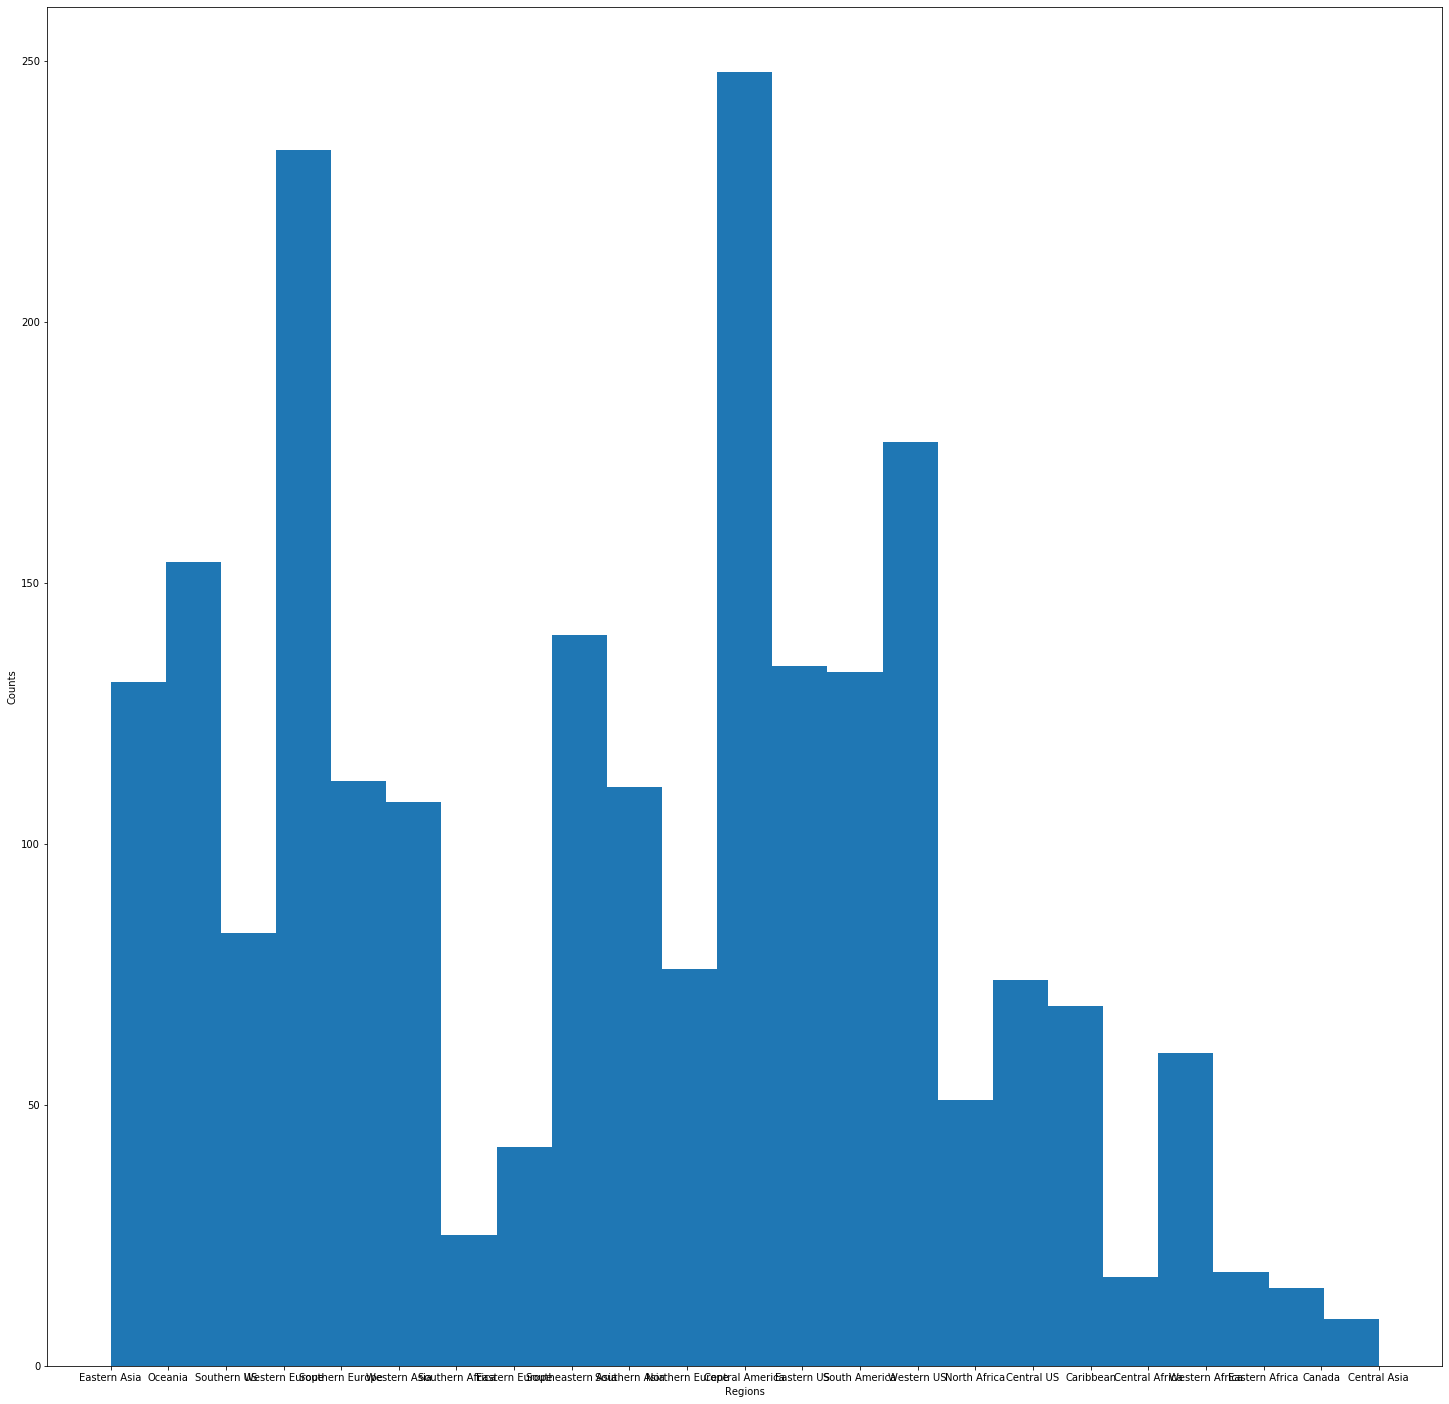

In [1688]:
fig = plt.figure()
plt.figure(figsize=(25,25))
fig.suptitle('Seasonal Number of FurnitureSales Distribution for Year ' + str(i))
plt.xlabel('Regions')
plt.ylabel("Counts")
plt.hist(merged['Region_x'], bins=len(np.unique(merged['Region_x'])))
plt.show()

In [1689]:
probs = []
for each in orderSet['Region'].unique():
    print(f"{each}'s return likliness: " + str(len(merged.loc[merged['Region_x'] == each])/len(orderSet.loc[orderSet['Region'] == each])))
    probs.append(len(merged.loc[merged['Region_x'] == each])/len(orderSet.loc[orderSet['Region'] == each]))
print('\nWestern US is most likely to return followed by Southern Europe and Eastern Asia is second most likely.')

Central US's return likliness: 0.031855359448988374
Oceania's return likliness: 0.04416403785488959
Western Europe's return likliness: 0.039605643379228284
Western Africa's return likliness: 0.0410958904109589
Western US's return likliness: 0.05526069310021855
Southern Asia's return likliness: 0.04180790960451977
Western Asia's return likliness: 0.04426229508196721
South America's return likliness: 0.044511378848728245
Eastern Asia's return likliness: 0.05518112889637742
Southern Europe's return likliness: 0.053005205868433505
Eastern Africa's return likliness: 0.024725274725274724
Eastern Europe's return likliness: 0.027468933943754086
Northern Europe's return likliness: 0.034482758620689655
Central America's return likliness: 0.04415954415954416
Eastern US's return likliness: 0.047050561797752806
Caribbean's return likliness: 0.04082840236686391
Central Africa's return likliness: 0.026438569206842923
Southeastern Asia's return likliness: 0.0447427293064877
Southern US's return liklin

<Figure size 432x288 with 0 Axes>

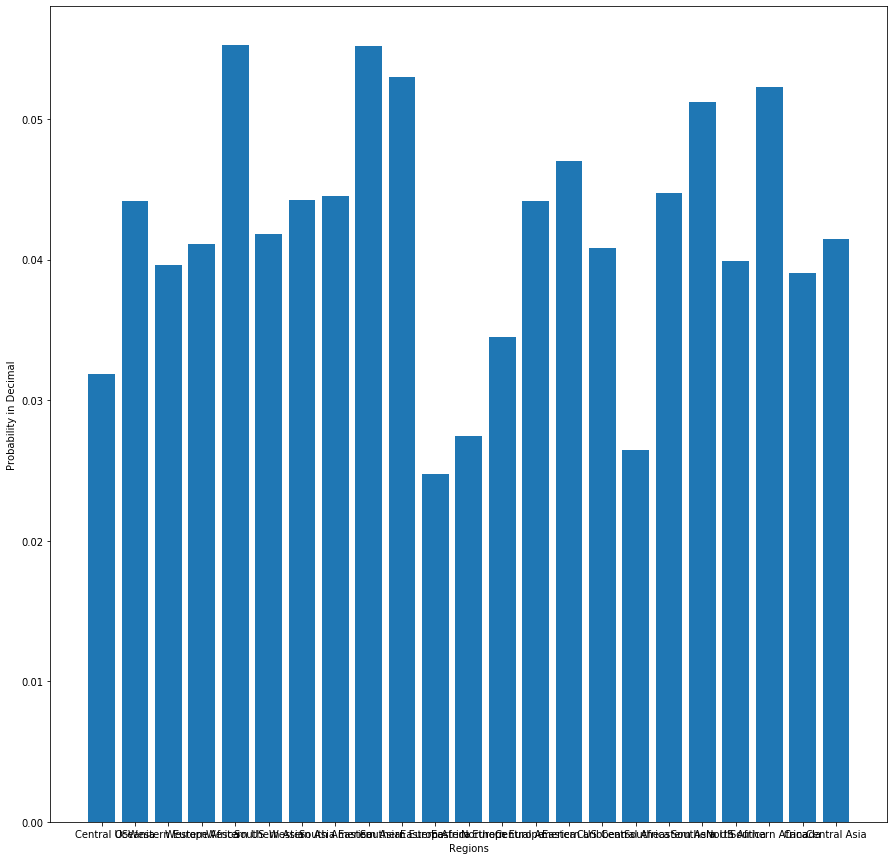

In [1690]:
#Graph for likliness of returning per region.
fig = plt.figure()
plt.figure(figsize=(15,15))
plt.xlabel('Regions')
plt.ylabel("Probability in Decimal")
plt.bar(orderSet['Region'].unique(), probs)
plt.show()

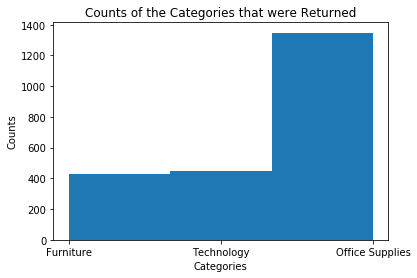

The Office Supplies items are first in terms of items bought.


In [1691]:
# NOT FINAL ANSWER, JUST THIS IS HERE FOR VISUALIZATION
plt.hist(merged['Category'], bins = len(merged['Category'].unique()))
plt.title('Counts of the Categories that were Returned')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()
print(f"The Office Supplies items are first in terms of items bought.")

Furniture's return likliness: 0.043306288032454364
Technology's return likliness: 0.043881274036091114
Office Supplies's return likliness: 0.04308223337275081
Technology is more likely to be returned, then furniture, then Office supplies, but there isn't much of a difference as seen in the graph below.

Liklihood graph below


<Figure size 432x288 with 0 Axes>

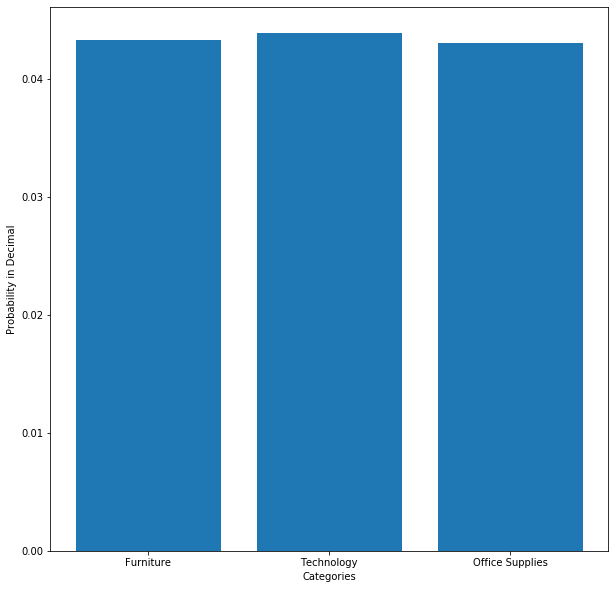

In [1692]:
pc = []
for item in merged['Category'].unique():
    ratio = len(merged.loc[merged['Category'] == item])/len(orderSet.loc[orderSet['Category'] == item])
    #print('Category: ' + cat)
    #print('Probability: ' + str())
    pc.append(ratio)
    print(f"{item}'s return likliness: {ratio}")

print("Technology is more likely to be returned, then furniture, then Office supplies, but there isn't much of a difference as seen in the graph below.")
print('\nLiklihood graph below')
#Graph for likliness of returning per category.
fig = plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Categories')
plt.ylabel("Probability in Decimal")
plt.bar(merged['Category'].unique(), pc)
plt.show()



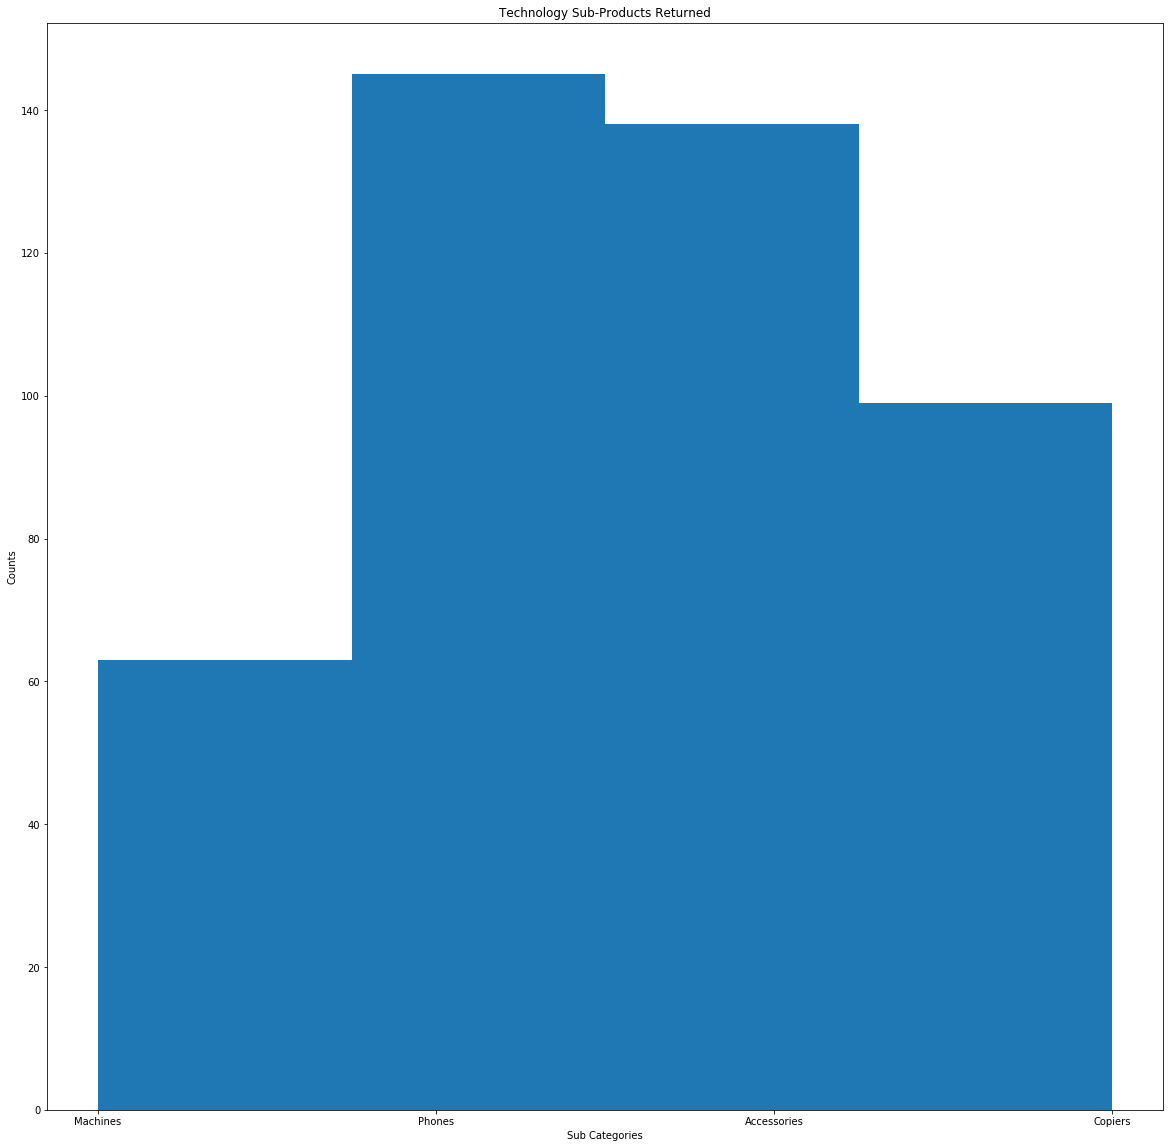

In the Tech sub-product, Phones had the highest returns, with Accessories having the second highest count. However this does not show how likely it is to be returned, this is just for visual. The liklihood answer and graph is below.


In [1693]:
tCategory = merged.loc[merged['Category'] == 'Technology']
plt.figure(figsize=(20,20))
plt.hist(tCategory['Sub.Category'], bins = len(tCategory['Sub.Category'].unique()))
plt.title('Technology Sub-Products Returned')
plt.xlabel('Sub Categories')
plt.ylabel('Counts')
plt.show()
print(f"In the Tech sub-product, Phones had the highest returns, with Accessories having the second highest count. However this does not show how likely it is to be returned, this is just for visual. The liklihood answer and graph is below.")

Machines's return likliness: 0.0423956931359354
Phones's return likliness: 0.04319332737563301
Accessories's return likliness: 0.0448780487804878
Copiers's return likliness: 0.044534412955465584
Accessories are the most likly to be returned looking at the ratio of returns, with copiers second most likely.

Liklihood graph below


<Figure size 432x288 with 0 Axes>

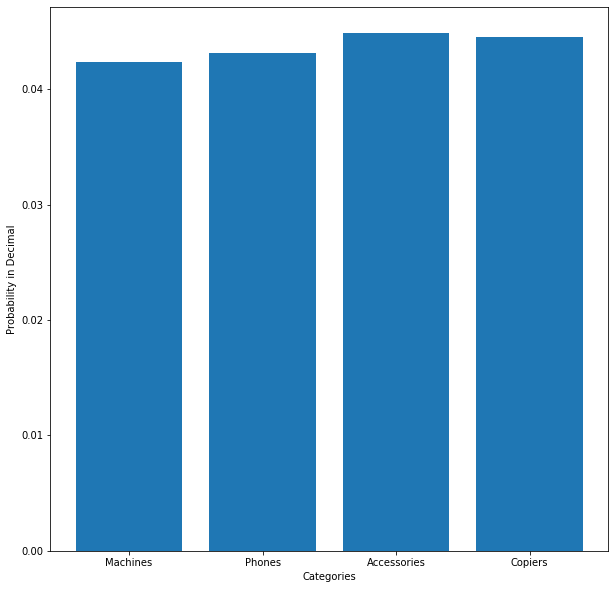

In [1694]:
subt = []
for item in merged.loc[merged['Category'] == 'Technology']["Sub.Category"].unique():
    ratio = len(merged.loc[merged['Sub.Category'] == item])/len(orderSet.loc[orderSet['Sub.Category'] == item])
    subt.append(ratio)
    pc.append(ratio)
    print(f"{item}'s return likliness: {ratio}")
    
print("Accessories are the most likly to be returned looking at the ratio of returns, with copiers second most likely.")
print('\nLiklihood graph below')
#Graph for likliness of returning per category.
fig = plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Categories')
plt.ylabel("Probability in Decimal")
plt.bar(merged.loc[merged['Category'] == 'Technology']["Sub.Category"].unique(), subt)
plt.show()

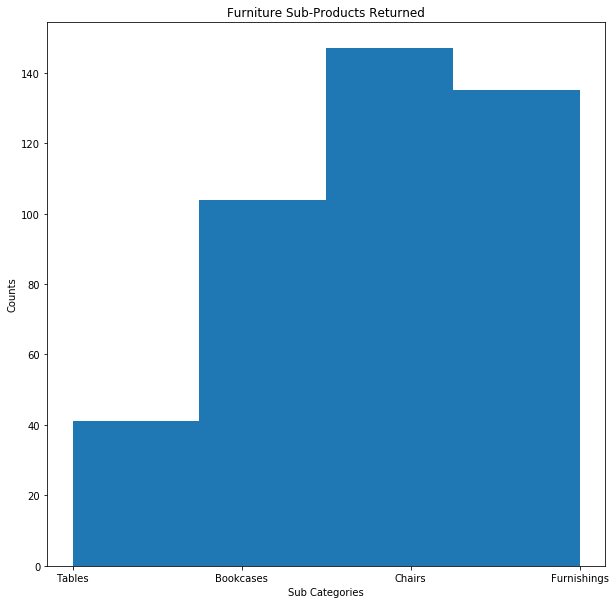

In the Furniture sub-product, Chairs have the highest number of returns, but does not necessarily mean most likely to be returned. The likliness of returns is in the below cell. This cell is just for more visualization.


In [1695]:
subCategory = merged.loc[merged['Category'] == 'Furniture']
plt.figure(figsize=(10,10))
plt.hist(subCategory['Sub.Category'], bins = len(subCategory['Sub.Category'].unique()))
plt.title('Furniture Sub-Products Returned')
plt.xlabel('Sub Categories')
plt.ylabel('Counts')
plt.show()
print(f"In the Furniture sub-product, Chairs have the highest number of returns, but does not necessarily mean most likely to be returned. The likliness of returns is in the below cell. This cell is just for more visualization.")

Tables's return likliness: 0.047619047619047616
Bookcases's return likliness: 0.043135628369970966
Chairs's return likliness: 0.04280722189866045
Furnishings's return likliness: 0.04280279010779962

Tables are most likly to be returned.

Liklihood graph below


<Figure size 432x288 with 0 Axes>

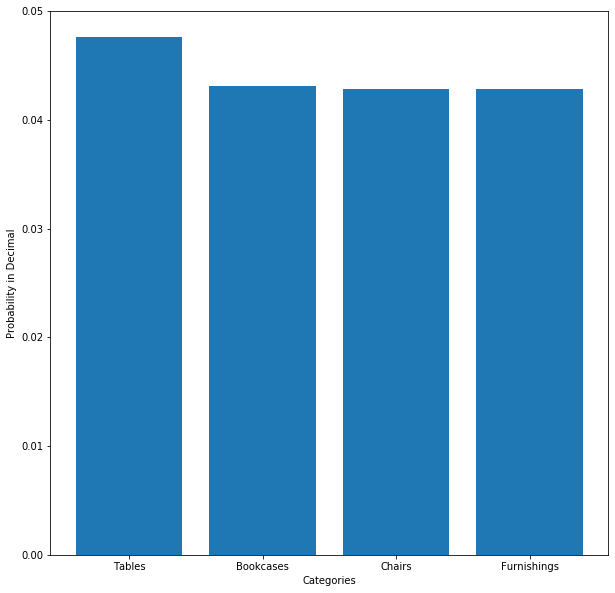

In [1696]:
subf = []
for item in merged.loc[merged['Category'] == 'Furniture']["Sub.Category"].unique():
    ratio = len(merged.loc[merged['Sub.Category'] == item])/len(orderSet.loc[orderSet['Sub.Category'] == item])
    subf.append(ratio)
    print(f"{item}'s return likliness: {ratio}")
    
print("\nTables are most likly to be returned.")
print('\nLiklihood graph below')
#Graph for likliness of returning per category.
fig = plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Categories')
plt.ylabel("Probability in Decimal")
plt.bar(merged.loc[merged['Category'] == 'Furniture']["Sub.Category"].unique(), subf)
plt.show()

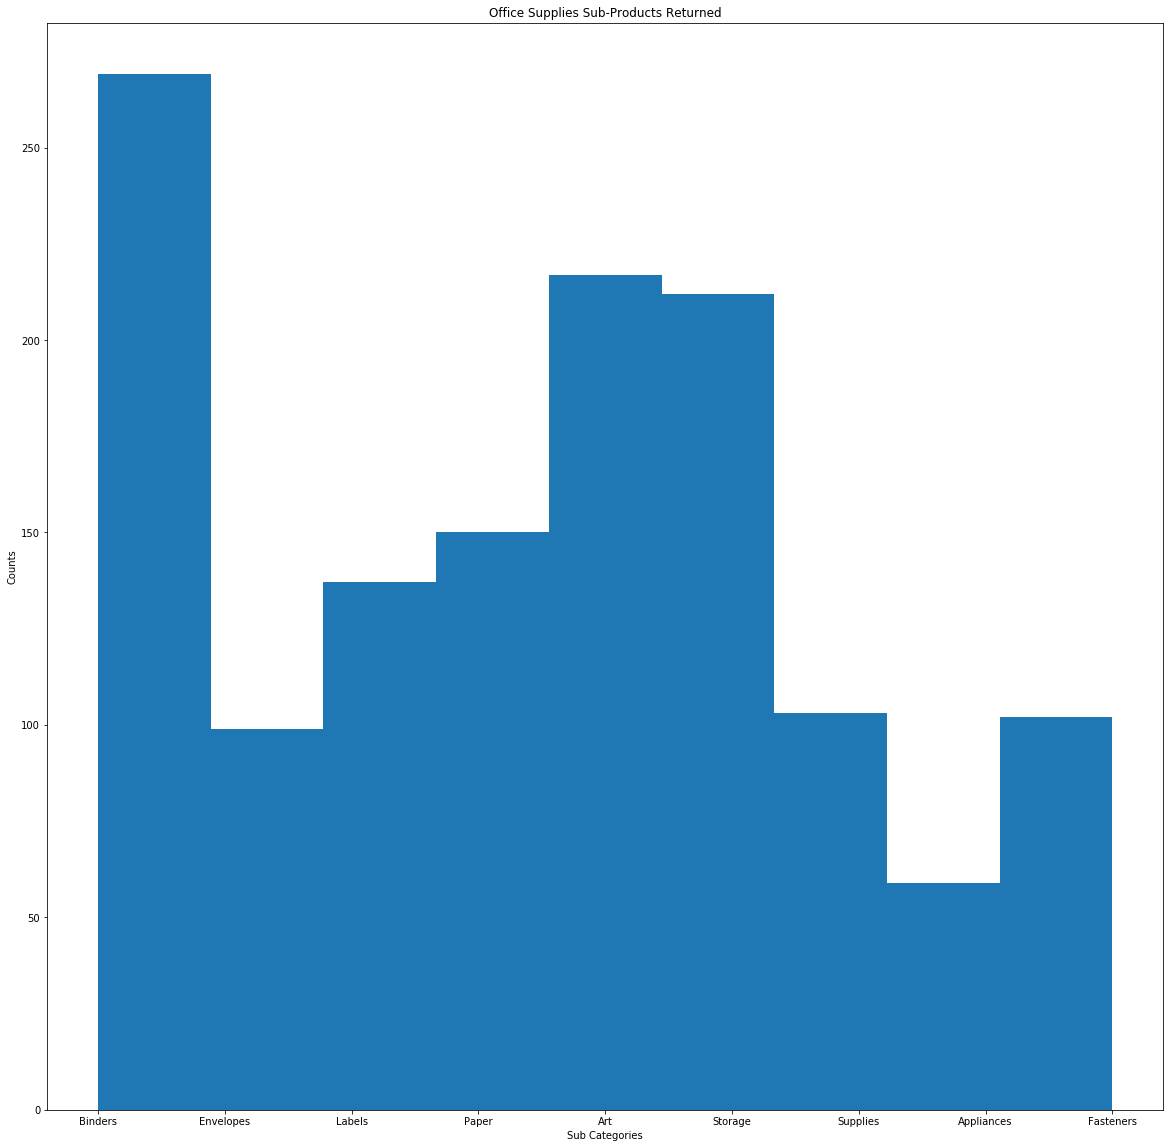

In the Office Supplies sub-product, Binders have the highest return count, but doesn't mean more probability of being returned. That is determined in the ratio cell in the next cell. This is just to see how many of each item was returned, but doesn't account for the probability of returned.


In [1697]:
subCategory = merged.loc[merged['Category'] == 'Office Supplies']
plt.figure(figsize=(20,20))
plt.hist(subCategory['Sub.Category'], bins = len(subCategory['Sub.Category'].unique()))
plt.title('Office Supplies Sub-Products Returned')
plt.xlabel('Sub Categories')
plt.ylabel('Counts')
plt.show()
print(f"In the Office Supplies sub-product, Binders have the highest return count, but doesn't mean more probability of being returned. That is determined in the ratio cell in the next cell. This is just to see how many of each item was returned, but doesn't account for the probability of returned.")

Binders's return likliness: 0.04376830458835015
Envelopes's return likliness: 0.041474654377880185
Labels's return likliness: 0.0526720492118416
Paper's return likliness: 0.0429553264604811
Art's return likliness: 0.04461348684210526
Storage's return likliness: 0.04198851257674787
Supplies's return likliness: 0.04279185708350644
Appliances's return likliness: 0.0338691159586682
Fasteners's return likliness: 0.0392156862745098

Labels are most likly to be returned.

Liklihood graph below


<Figure size 432x288 with 0 Axes>

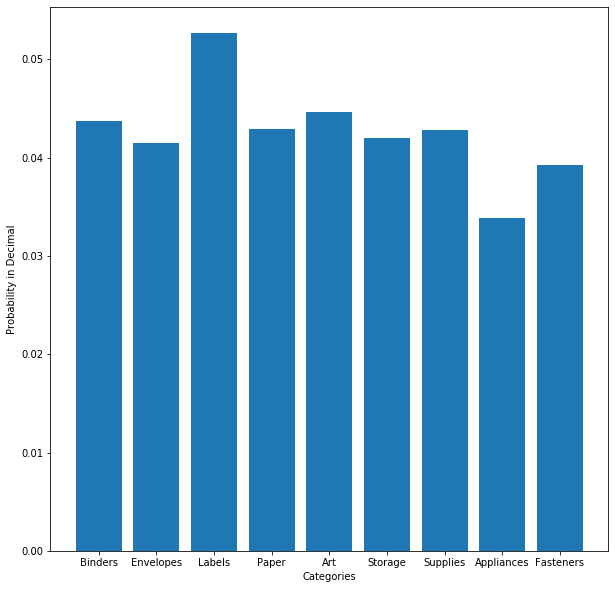

In [1698]:
suboc = []
for item in merged.loc[merged['Category'] == 'Office Supplies']["Sub.Category"].unique():
    ratio = len(merged.loc[merged['Sub.Category'] == item])/len(orderSet.loc[orderSet['Sub.Category'] == item])
    suboc.append(ratio)
    print(f"{item}'s return likliness: {ratio}")
    
print("\nLabels are most likly to be returned.")
print('\nLiklihood graph below')
#Graph for likliness of returning per category.
fig = plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Categories')
plt.ylabel("Probability in Decimal")
plt.bar(merged.loc[merged['Category'] == 'Office Supplies']["Sub.Category"].unique(), suboc)
plt.show()

In [1699]:
np.unique(merged['Ship.Mode'])

array(['First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype=object)

In [1700]:
returnedFC = merged.loc[merged['Ship.Mode'] == 'First Class']
returnedSD = merged.loc[merged['Ship.Mode'] == 'Same Day']
returnedSC = merged.loc[merged['Ship.Mode'] == 'Second Class']
returnedSTD = merged.loc[merged['Ship.Mode'] == 'Standard Class']

regFC = orderSet.loc[orderSet['Ship.Mode'] == 'First Class']
regSD = orderSet.loc[orderSet['Ship.Mode'] == 'Same Day']
regSC = orderSet.loc[orderSet['Ship.Mode'] == 'Second Class']
regSTD = orderSet.loc[orderSet['Ship.Mode'] == 'Standard Class']

The probability of a First Class Mail being returned is 0.04157228514323784.
The probability of a Same Day Mail being returned is 0.044427989633469084.
The probability of a Second Class Mail being returned is 0.0384130371520031.
The probability of a Standard Class Mail being returned is 0.04523151909017059.

Standard class was most likly to be returned, followed by same day mail being second most likely based on the distribution below. However, they were all returned at a similar liklihood within 1-2 percent of one another.




<Figure size 432x288 with 0 Axes>

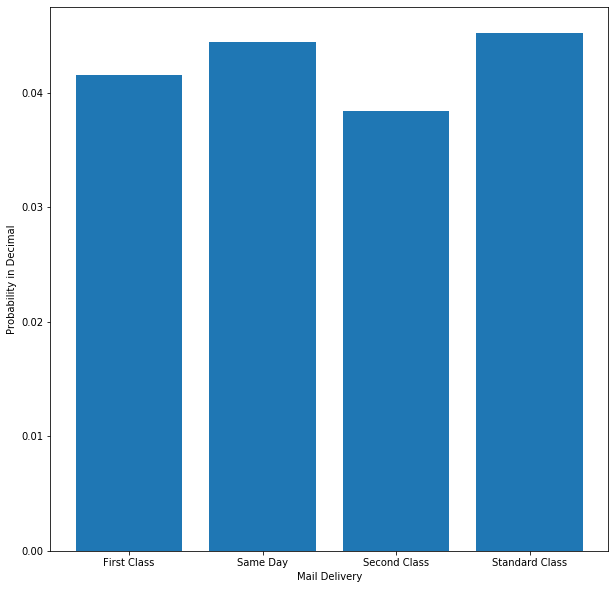

In [1701]:
try:
    print(f"The probability of a First Class Mail being returned is {len(returnedFC) / len(regFC)}.")
except:
    print(f"The probability of a First Class Mail being returned is 0.")
    
try:
    print(f"The probability of a Same Day Mail being returned is {len(returnedSD) / len(regSD)}.")
except:
    print(f"The probability of a Same Day Mail being returned is 0.")

try:
    print(f"The probability of a Second Class Mail being returned is {len(returnedSC) / len(regSC)}.")
except:
    print(f"The probability of a Second Class Mail being returned is 0.")

try:
    print(f"The probability of a Standard Class Mail being returned is {len(returnedSTD) / len(regSTD)}.")
except:
    print(f"The probability of a Standard Class Mail being returned is 0.")
    
print("\nStandard class was most likly to be returned, followed by same day mail being second most likely based on the distribution below. However, they were all returned at a similar liklihood within 1-2 percent of one another.")
print('\n')
pmail = [len(returnedFC) / len(regFC), len(returnedSD) / len(regSD), len(returnedSC) / len(regSC), len(returnedSTD) / len(regSTD)]

fig = plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Mail Delivery')
plt.ylabel("Probability in Decimal")
plt.bar(np.unique(merged['Ship.Mode']), pmail)
plt.show()

In [1702]:
merged.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Quantity', 'Discount', 'Shipping.Cost',
       'Order.Priority', 'New Profit', 'New Sales', 'Season', 'Returned',
       'Region_y', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')

1-4. Add a column "Order_Month” with the month that the order was submitted. (2 pts)

In [1703]:
om = []
for index, item in orderSet.iterrows():
    om.append(item['Order.Date'].month)
orderSet['Order_Month'] = om

In [1704]:
orderSet

Row.ID                  Order.ID Order.Date  Ship.Date       Ship.Mode  \
0       40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
1       26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
2       25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18     First Class   
3       13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30     First Class   
4       47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06        Same Day   
...       ...                       ...        ...        ...             ...   
51285   29002   IN-2015-KE1642066-42174 2015-06-19 2015-06-19        Same Day   
51286   34337  US-2014-ZD21925140-41765 2014-05-06 2014-05-10  Standard Class   
51287   31315  CA-2012-ZD21925140-41147 2012-08-26 2012-08-31    Second Class   
51288    9596   MX-2013-RB1979518-41322 2013-02-17 2013-02-21  Standard Class   
51289    6147   MX-2013-MC1810093-41416 2013-05-22 2013-05-26    Second Class   

        Customer.ID       Customer.Name      Segment  Postal.Code  \
0      AB-100151402       Aaron Bergman     Consumer      73120.0   
1         JR-162107       Justin Ritter    Corporate          NaN   
2         CR-127307        Craig Reiter     Consumer          NaN   
3        KM-1637548    Katherine Murray  Home Office          NaN   
4        RH-9495111         Rick Hansen     Consumer          NaN   
...             ...                 ...          ...          ...   
51285    KE-1642066     Katrina Edelman    Corporate          NaN   
51286  ZD-219251408  Zuschuss Donatelli     Consumer      37421.0   
51287  ZD-219251404  Zuschuss Donatelli     Consumer      94109.0   
51288    RB-1979518          Ross Baird  Home Office          NaN   
51289    MC-1810093       Mick Crebagga     Consumer          NaN   

                City  ... Sub.Category  \
0      Oklahoma City  ...       Phones   
1         Wollongong  ...       Chairs   
2           Brisbane  ...       Phones   
3             Berlin  ...       Phones   
4              Dakar  ...      Copiers   
...              ...  ...          ...   
51285           Kure  ...    Fasteners   
51286    Chattanooga  ...  Furnishings   
51287  San Francisco  ...          Art   
51288       Valinhos  ...      Binders   
51289       Tipitapa  ...        Paper   

                                        Product.Name Quantity Discount  \
0                                   Samsung Convoy 3        2      0.0   
1          Novimex Executive Leather Armchair, Black        9      0.1   
2                  Nokia Smart Phone, with Caller ID        9      0.1   
3                     Motorola Smart Phone, Cordless        5      0.1   
4                     Sharp Wireless Fax, High-Speed        8      0.0   
...                                              ...      ...      ...   
51285                  Advantus Thumb Tacks, 12 Pack        5      0.0   
51286  Eldon Image Series Desk Accessories, Burgundy        5      0.2   
51287                                     Newell 341        2      0.0   
51288                        Acco Index Tab, Economy        2      0.0   
51289        Eaton Computer Printout Paper, 8.5 x 11        3      0.0   

      Shipping.Cost Order.Priority New Profit New Sales  Season  Order_Month  
0            40.770           High      62.15    221.98    Fall           11  
1           923.630       Critical    -288.77   3709.40  Winter            2  
2           915.490         Medium     919.97   5175.17    Fall           10  
3           910.160         Medium     -96.54   2892.51  Winter            1  
4           903.040       Critical     311.52   2832.96    Fall           11  
...             ...            ...        ...       ...     ...          ...  
51285         1.010         Medium       4.50     65.10  Spring            6  
51286         1.930           High       3.34     16.72  Spring            5  
51287         1.580           High       2.48      8.56  Summer            8  
51288         1.003  

1-5. Generate a categorical variable which indicates whether an order has been returned or not. (2 pts)

In [1705]:
orderSetNew = orderSet.merge(returns, how = 'left', on='Order.ID')
orderSetNew['Returned'] = orderSetNew['Returned'].fillna('No')

In [1706]:
np.unique(orderSetNew['Returned'])

array(['No', 'Yes'], dtype=object)

In [1707]:
orderSetNew

Row.ID                  Order.ID Order.Date  Ship.Date       Ship.Mode  \
0       40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
1       26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
2       25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18     First Class   
3       13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30     First Class   
4       47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06        Same Day   
...       ...                       ...        ...        ...             ...   
51285   29002   IN-2015-KE1642066-42174 2015-06-19 2015-06-19        Same Day   
51286   34337  US-2014-ZD21925140-41765 2014-05-06 2014-05-10  Standard Class   
51287   31315  CA-2012-ZD21925140-41147 2012-08-26 2012-08-31    Second Class   
51288    9596   MX-2013-RB1979518-41322 2013-02-17 2013-02-21  Standard Class   
51289    6147   MX-2013-MC1810093-41416 2013-05-22 2013-05-26    Second Class   

        Customer.ID       Customer.Name      Segment  Postal.Code  \
0      AB-100151402       Aaron Bergman     Consumer      73120.0   
1         JR-162107       Justin Ritter    Corporate          NaN   
2         CR-127307        Craig Reiter     Consumer          NaN   
3        KM-1637548    Katherine Murray  Home Office          NaN   
4        RH-9495111         Rick Hansen     Consumer          NaN   
...             ...                 ...          ...          ...   
51285    KE-1642066     Katrina Edelman    Corporate          NaN   
51286  ZD-219251408  Zuschuss Donatelli     Consumer      37421.0   
51287  ZD-219251404  Zuschuss Donatelli     Consumer      94109.0   
51288    RB-1979518          Ross Baird  Home Office          NaN   
51289    MC-1810093       Mick Crebagga     Consumer          NaN   

                City  ... Shipping.Cost Order.Priority New Profit New Sales  \
0      Oklahoma City  ...        40.770           High      62.15    221.98   
1         Wollongong  ...       923.630       Critical    -288.77   3709.40   
2           Brisbane  ...       915.490         Medium     919.97   5175.17   
3             Berlin  ...       910.160         Medium     -96.54   2892.51   
4              Dakar  ...       903.040       Critical     311.52   2832.96   
...              ...  ...           ...            ...        ...       ...   
51285           Kure  ...         1.010         Medium       4.50     65.10   
51286    Chattanooga  ...         1.930           High       3.34     16.72   
51287  San Francisco  ...         1.580           High       2.48      8.56   
51288       Valinhos  ...         1.003         Medium       2.40     13.44   
51289       Tipitapa  ...         1.002           High       1.80     61.38   

       Season Order_Month Returned Region_y  Unnamed: 3  Unnamed: 4  
0        Fall          11       No      NaN         NaN         NaN  
1      Winter           2       No      NaN         NaN         NaN  
2        Fall          10       No      NaN         NaN         NaN  
3      Winter           1       No      NaN         NaN         NaN  
4        Fall          11       No      NaN         NaN         NaN  
...       ...         ...      ...      ...         ...         ...  
51285  Spring           6       No      NaN         NaN         NaN  
51286  Spring           5       No      NaN         NaN         NaN  
51287  Summer           8       No      NaN         NaN         NaN  
51288  Winter           2       No      NaN         NaN         NaN  
51289  Spring           5       No      NaN         NaN         NaN  

[51290 rows x 30 columns]

1-6. Generate a feature which can measure how long it takes the company to process each order. (Process.Time = Ship.Date - Order.Date) (3 pts)

In [1708]:
orderSetNew['Process.Time'] = orderSetNew['Ship.Date'] - orderSetNew['Order.Date'] 
orderSetNew.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Quantity', 'Discount', 'Shipping.Cost',
       'Order.Priority', 'New Profit', 'New Sales', 'Season', 'Order_Month',
       'Returned', 'Region_y', 'Unnamed: 3', 'Unnamed: 4', 'Process.Time'],
      dtype='object')

In [1709]:
orderSetNew['Process.Time'].head(5)

0   2 days
1   2 days
2   1 days
3   2 days
4   1 days
Name: Process.Time, dtype: timedelta64[ns]

1-7. Generate a feature indictes how many times the product has been returned before. (2 pts)

In [1710]:
nf = {}
for index, item in orderSetNew.iterrows():
    if item['Product.ID'] in nf:
        nf[item['Product.ID']] += item['Quantity']
    else:
        nf[item['Product.ID']] = item['Quantity']
        
        
len(nf)

3788

In [1711]:
len(np.unique(orderSetNew['Product.ID']))

3788

1-8. Save the final dataframe as `YourName_Problem3_EDA_DONE.csv` and submit. (3 pts)

In [1712]:
orderSetNew.to_csv('AvaneeshKolluri_Problem3_EDA_DONE.csv')

### 2. Classification Problem. (35 pts)
In this problem, the task is to classify using two given data sets, `Data1.csv` and `Data1_Class.csv`. `Data1.csv` file has two features, $X$ and $Y$, and `Data1_Class.csv` has the true class label of the data. `Data1_Class.csv` must not be opened until step 8. 

2-1. Load the data `Data1.csv`. (2 pts)

In [1533]:
data1 = pd.read_csv('Data1.csv')

In [1534]:
data1

Unnamed: 0         X         Y
0             0  0.759596  0.338615
1             1 -0.054081 -1.015513
2             2  0.239503  0.969903
3             3 -0.873011  0.033360
4             4 -0.844087 -0.011398
..          ...       ...       ...
995         995 -0.483807 -0.897388
996         996 -0.321947  0.975426
997         997  0.823918  0.544920
998         998  0.549605  0.900108
999         999 -0.164530 -0.850531

[1000 rows x 3 columns]

2-2. Randomly select 70% observations and call this dataset `Data1_training`. Visualize the data distribution. (4 pts)

In [1535]:
Data1_training = data1.sample(frac = .7)

In [1536]:
Data1_training

Unnamed: 0         X         Y
955         955  1.013397 -0.331290
26           26  0.252415 -0.964312
277         277 -0.775339 -0.645079
708         708 -0.923850  0.199976
144         144  0.943837 -0.314554
..          ...       ...       ...
271         271  0.292673  0.865790
613         613  0.528929 -0.643573
464         464  0.644406  0.595792
193         193 -0.409447 -0.881348
853         853  0.605938  0.491156

[700 rows x 3 columns]

Index(['X', 'Y'], dtype='object')


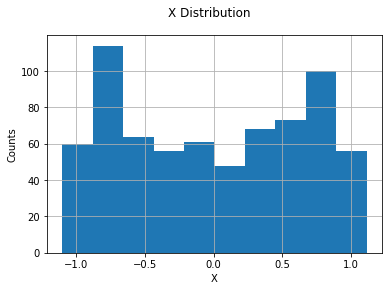

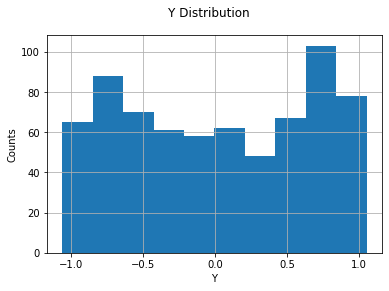

It seems like both the X and Y features are distributed bimodally.


In [1537]:
print(Data1_training.columns[1:])
for column in Data1_training.columns[1:]:
    fig = plt.figure()
    fig.suptitle(str(column) + ' Distribution')
    plt.xlabel(column)
    plt.ylabel("Counts")
    Data1_training[column].hist(bins=10)
    plt.show()
    
print("It seems like both the X and Y features are distributed bimodally.")

Index(['X', 'Y'], dtype='object')


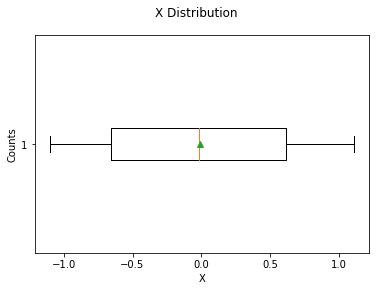

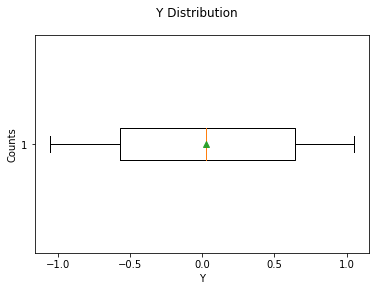

In [1538]:
print(Data1_training.columns[1:])
for column in Data1_training.columns[1:]:
    fig = plt.figure()
    fig.suptitle(str(column) + ' Distribution')
    plt.xlabel(column)
    plt.ylabel("Counts")
    plt.boxplot(Data1_training[column], vert = False, showmeans=True)
    plt.show()

Text(0, 0.5, 'Y')

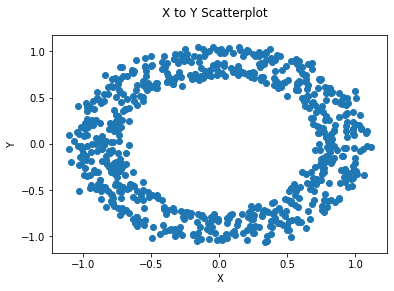

In [1539]:
fig = plt.figure()
fig.suptitle('X to Y Scatterplot')
plt.scatter(Data1_training['X'], Data1_training['Y'])
plt.xlabel('X')
plt.ylabel('Y')

2-3. Transform the `Data1_training` into a new space using $k(x,x')=(x\cdot x)$. Add this feature into `Data1_training`. If you cannot do this, you can ask me for a help. I will provide `Data1_trainig` data after feature mapping and you will recieve 0 on this subproblem. My `Data1_training` will be different from your `Data1_training` obtained from step 2 and you will be using my `Data1_training` from here. (6 pts)

In [1540]:
Data1_training["X'"] = Data1_training['X'] * Data1_training['X']
Data1_training

Unnamed: 0         X         Y        X'
955         955  1.013397 -0.331290  1.026974
26           26  0.252415 -0.964312  0.063713
277         277 -0.775339 -0.645079  0.601151
708         708 -0.923850  0.199976  0.853499
144         144  0.943837 -0.314554  0.890828
..          ...       ...       ...       ...
271         271  0.292673  0.865790  0.085657
613         613  0.528929 -0.643573  0.279766
464         464  0.644406  0.595792  0.415259
193         193 -0.409447 -0.881348  0.167647
853         853  0.605938  0.491156  0.367161

[700 rows x 4 columns]

2-4. Cluster `Data1_training` using Kmeans and determine the appropriate cluster number $K$. Make an elbow diagram to prove your answer.  (6 pts)

In [1541]:
for size in range(1,20):
    kmeans = KMeans(n_clusters = size)
    kmeans = kmeans.fit(Data1_training[['X',"X'", "Y"]])

In [1542]:
def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

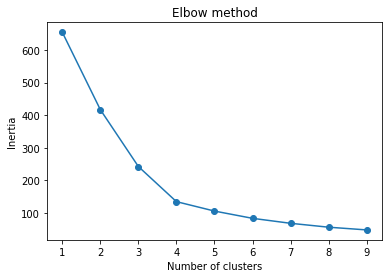

In [1543]:
plot_inertia(kmeans, Data1_training[['X',"X'", "Y"]], range(1, 10))

2-5. Assign the cluster ID to `Data1_training` and make a histrogram of the cluster ID distribution. (2 pts)

In [1544]:
kmeansOptimal = KMeans(n_clusters=4)
kmeansOptimal.fit(Data1_training[['X',"X'", "Y"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [1545]:
Data1_training['Cluster ID'] = kmeansOptimal.labels_

In [1546]:
clst = []
for i in np.unique(kmeansOptimal.labels_):
    count = len(np.where(kmeansOptimal.labels_ == i)[0])
    clst.append(count)

diccnt = {'Labels': np.unique(kmeansOptimal.labels_), 'Count per Label': clst}
pd.DataFrame(data=diccnt)

Labels  Count per Label
0       0              184
1       1              167
2       2              190
3       3              159

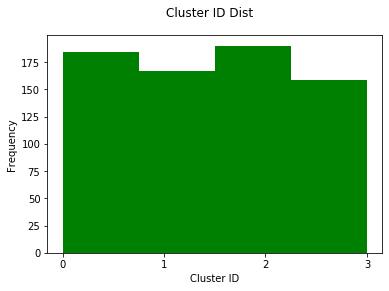

In [1547]:
fig = plt.figure()
fig.suptitle('Cluster ID Dist')
plt.hist(kmeansOptimal.labels_, bins = len(np.unique(kmeansOptimal.labels_)), align='mid', color = 'green')
plt.xticks([0,1,2,3])
plt.xlabel('Cluster ID')
plt.ylabel('Frequency')
plt.show()

2-6. Train the classification model using `Data1_training`. Report the accuracy of training model. (6 pts)

In [1585]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data1_training[['X', "X'", "Y"]], kmeansOptimal.labels_, test_size=0.2, random_state=42)

In [1586]:
kmeansMini = KMeans(n_clusters=4)
kmeansMini.fit(X_train)
predictedVals = kmeansMini.predict(X_train)

In [1587]:
np.unique(y_train)

array([0, 1, 2, 3], dtype=int32)

In [1588]:
from scipy import stats
inferred_labels = {}
for i in range(4):
    labels = []
    index = np.where(kmeansMini.labels_ == i)
    labels.append(y_train[index])
    #print(labels)
    #print('\n')
    counts = stats.mode(labels[0])[0][0]
    if counts in inferred_labels:
        inferred_labels[counts].append(i)
    else:
        inferred_labels[counts] = [i]
    
print(inferred_labels)

{3: [0], 2: [1], 1: [2], 0: [3]}


In [1589]:
predarr = []
for i in kmeansMini.predict(X_test):
    predarr.append(inferred_labels[i])

In [1590]:
accuracy_score(y_test, predarr)

0.9928571428571429

In [1554]:
len(kmeansOptimal.labels_)

700

In [1555]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(Data1_training.drop(columns = ['Cluster ID']) , kmeansOptimal.labels_)

print(rf.score(Data1_training.drop(columns = ['Cluster ID']) , kmeansOptimal.labels_))

1.0


The Kmeans sometimes has a good performance after mapping the centroids with the correct labels with the Y value, but depending on the iteration, the accuracy is not consistant. After running it on a Random Forest classification model, the model predicts the labels 100% accurately. I used Kmeans and also another classification model here because the question was not specific as to train what classification model. And because I was curious about the performance of this model.

2-7. Make a plot of `Data1`. Explain which algorithm is the most appropriate to classfy? (4 pts)

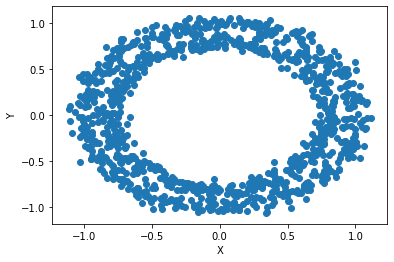

In [1556]:
#### Plot #####
plt.scatter(data1['X'], data1['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**I think K Nearest Neighbors** is an appropriate model because based on the input data and what you assign it to have a k amount of neighbors to choose from, it will predict accordingly based on the euclidean distance of the vectors. The data also does not have to be linearly separable which is good because this data seems like it plots a circle, which makes it hard to separate it linearly. Because all the data is close to one another in this circular dataset, it will find the k closest neighbors to it then use the majority vote, or mode, to pick and classify the label.

#### Explanation


2-8. Using the algorithm answered in 7, make a classifcation model and report the accuracy. (5 pts)

In [1557]:
dataClass = pd.read_csv('Data1_Class.csv')

In [1558]:
merge_train = Data1_training[['X','Y',"X'", 'Unnamed: 0']].merge(dataClass, how = 'inner', on = 'Unnamed: 0')
merge_train

X         Y        X'  Unnamed: 0  Class
0    1.013397 -0.331290  1.026974         955      0
1    0.252415 -0.964312  0.063713          26      0
2   -0.775339 -0.645079  0.601151         277      0
3   -0.923850  0.199976  0.853499         708      0
4    0.943837 -0.314554  0.890828         144      0
..        ...       ...       ...         ...    ...
695  0.292673  0.865790  0.085657         271      1
696  0.528929 -0.643573  0.279766         613      1
697  0.644406  0.595792  0.415259         464      1
698 -0.409447 -0.881348  0.167647         193      0
699  0.605938  0.491156  0.367161         853      1

[700 rows x 5 columns]

In [1559]:
indexxx = [i for i in range(1000)]
delete = np.array(merge_train['Unnamed: 0'])
n_keep = []
for i in indexxx:
    if i not in delete:
        n_keep.append(i)
merge_test = data1.loc[n_keep]
merge_test["X'"] = merge_test['X'] * merge_test['X']
merge_test = merge_test.merge(dataClass, how = 'inner', on = 'Unnamed: 0')

In [1560]:
merge_test

Unnamed: 0         X         Y        X'  Class
0             1 -0.054081 -1.015513  0.002925      0
1             2  0.239503  0.969903  0.057362      0
2             5  0.038018  0.771611  0.001445      1
3            10 -0.506492 -0.948618  0.256535      0
4            11 -0.692316 -0.628535  0.479301      0
..          ...       ...       ...       ...    ...
295         964 -0.605934  0.812976  0.367155      0
296         965  0.949516  0.345028  0.901581      0
297         977 -0.808992 -0.341119  0.654469      1
298         984 -0.819479 -0.277980  0.671546      1
299         990 -0.482521 -0.761983  0.232826      1

[300 rows x 5 columns]

In [1561]:
x_train = merge_train[['X', 'Y', "X'"]]
y_train = merge_train['Class']
x_test = merge_test[['X', 'Y', "X'"]]
y_test = merge_test['Class']

**I reported it as (Train Score, Test Score).** As mentioned before, I thought this would perform well and it seems to do so, however may be overfitting a little, but it still performs well on the test data.

In [1562]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

print(knn.score(x_train , y_train), knn.score(x_test , y_test))

0.9814285714285714 0.9733333333333334


### 3. Gradient Descent Problem. (25 pts)
The task of this problem is to numerically find the minimum solution of the function below by improving the initial guess. 
$$F(\textbf{X})=x_1^2 + x_1x_2+2x_1x_3+5x_2^2+6x_2x_3+x_3^2+2x_1-8x_2+9x_3+x_1x_4+x_2x_5$$
Assume the initial guess of $\textbf{X}=[2,2,2,2,2]$, the learning rate $\eta=0.01$, and the critical value $\epsilon=0.02$.

Here is the pseudo code:
1. Initialize the weights $\textbf{X}$ randomly.
2. Calculate the gradients $\textbf{G}$ of cost function w.r.t parameters. 
3. Update the weights by an amount proportional to $\textbf{G}$.
4. Repeat until the cost $J(\textbf{X})$ stops reducing, or some other pre-defined termination criteria is met.

3-1. Evaluate $F(\textbf{X})$ using the initial $\textbf{x}$. (2 pts)

In [1652]:
def initializeWeight():
    return [np.random.randint(10) for i in range(5)]

In [1653]:
def fx(x):
    first = x[0]**2
    second = x[0]*x[1]
    third = 2*x[0]*x[2]
    fourth = 5 * x[1] * x[1]
    fifth = 6*x[1]*x[2]
    sixth = x[2]**2
    seventh = 2*x[0]
    eighth = (-8)*x[1]
    ninth = 9*x[2]
    tenth = x[0]*x[3]
    eleventh = x[1]*x[4]
    return first + second + third + fourth + fifth + sixth + seventh + eighth + ninth + tenth + eleventh

In [1654]:
X=[2,2,2,2,2]
fx(X)

78

3-2. Evaluate $\textbf{G}$ using the given $\eta=0.01$. (2 pts)

In [1655]:
def gradient(x):
    x1, x2, x3, x4, x5 = x
    new1 = (2*x1) + x2 + (2*x3) + 2 + x4
    new2 = x1 + (10 * x2) + (6 * x3) - 8 + x5
    new3 = (2 * x1) + (6 * x2) + (2 * x3) + 9
    new4 = x1
    new5 = x2
    return [new1, new2, new3, new4, new5]

In [1656]:
print(f'G: {gradient(X)}')

G: [14, 28, 29, 2, 2]


3-3. Update $\textbf{X}$. (2 pts)

In [1657]:
def calcX(x, lr):
    grad = gradient(x)
    x1, x2, x3, x4, x5 = x
    g1, g2, g3, g4, g5 = grad
    new1 = x1 - (lr * g1)
    new2 = x2 - (lr * g2)
    new3 = x3 - (lr * g3)
    new4 = x4 - (lr * g4)
    new5 = x5 - (lr * g5)
    return [new1, new2, new3, new4, new5]

In [1658]:
# Temp is my updated X value in a dummy variable because I use X later in my code.
n = .01
temp = calcX(X, n)
temp

[1.8599999999999999, 1.72, 1.71, 1.98, 1.98]

3-4. Determine $J(\textbf{X})$. How far is it off from the critical value? (1 pts)

In [1659]:
#### Takes the sum of squared differences to calculate a single error value to compare to critical
import math
def J(before, after):
    return math.sqrt(sum([(i-j)**2 for i,j in zip(before, after)]))

In [1660]:
error = J(X, temp)
print(f"It is this much off from the critical value: {error - .02}")

It is this much off from the critical value: 0.407668095606862


3-5. Repeat steps 1 to 4 untile you observe the function converges. Report the iteration number $i$. It would be easy if you make a function that repeats step 1 to 4, e.g., `for` loop. (10 pts)

In [1661]:
def converging(x, lr, cval):
    xvals = []
    yvals = []
    yvals.append(x)
    iterations = 1
    xvals.append(iterations)
    narr = calcX(x, lr)
    error = J(x, narr)
    pre_der = int
    post_der = J(x, narr)
    while(True):
        #print(J(x, narr))
        if iterations > 1:
            if (J(narr, x) <= cval) or (pre_der < post_der) or (iterations > 5000):
                break
        iterations += 1
        xvals.append(iterations)
        x = narr
        yvals.append(x)
        narr = calcX(narr, lr)
        error = J(x, narr)
        pre_der = post_der
        post_der = J(x, narr)
    return (xvals[:-1], yvals[:-1])

In [1662]:
converging(X, .01, .02)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [[2, 2, 2, 2, 2],
  [1.8599999999999999, 1.72, 1.71, 1.98, 1.98],
  [1.7315999999999998, 1.4869999999999999, 1.4454, 1.9614, 1.9627999999999999],
  [1.613576, 1.294632, 1.2026400000000002, 1.9440840000000001, 1.94793],
  [1.50486452, 1.1373953399999999, 0.9786377600000001, 1.92794824, 1.93498368],
  [1.4045410386,
   1.0105390583999998,
   0.7707239940000001,
   1.9128995948,
   1.9236097266],
  [1.3118013514159999,
   0.9099602052679998,
   0.5765863498440001,
   1.8988541844140001,
   1.913504336016],
  [1.2259454534939798,
   0.8321159468762398,
   0.39422098350272017,
   1.8857361708998401,
   1.90440473396332],
  [1.146363603576285,
   0.7739475913038796,
   0.22189069795021177,
   1.8734767163649004,
   1.8960835744945577],
  [1.0725242744690673,
   0.7328149185157705,
   0.05808875644144906,
   1.8620130803291375,
   1.888344098581519],
  [1.003963733862408,
   0.7064394175472006,
   -0.09849239928770748,

In [1663]:
print(f"The cost function stops reducing after the {converging(X, .01, .02)[0][-1]}'th iteration.")

The cost function stops reducing after the 20'th iteration.


3-6. Make a graph of $F(\textbf{X})$ vs. iteration $i$. (3 pts)

In [1664]:
xy = converging(X, .01, .02)
realy = []
for i in xy[1]:
    realy.append(fx(i))

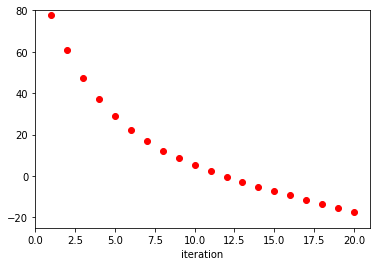

<Figure size 2880x2880 with 0 Axes>

In [1665]:
plt.plot(xy[0], realy, 'ro')
plt.xlim([0, 21])
plt.ylim([-25, 80])
plt.xlabel('iteration')
plt.ylabel('F(X)')
plt.ylabel('')
plt.figure(figsize=(40,40))
plt.show()